In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [3]:
# 空間データなので geopandas (gpd) でインポート

hmesh1 = gpd.read_file('data2/SDDSWS5132.zip')
hmesh2 = gpd.read_file('data2/SDDSWS5133.zip')
hmesh3 = gpd.read_file('data2/SDDSWS5232.zip')
hmesh4 = gpd.read_file('data2/SDDSWS5233.zip')

In [4]:
# ファイルの統合
# combine all four mesh shapes
hiroshimamesh = gpd.pd.concat([hmesh1,hmesh2,hmesh3,hmesh4])

<Axes: >

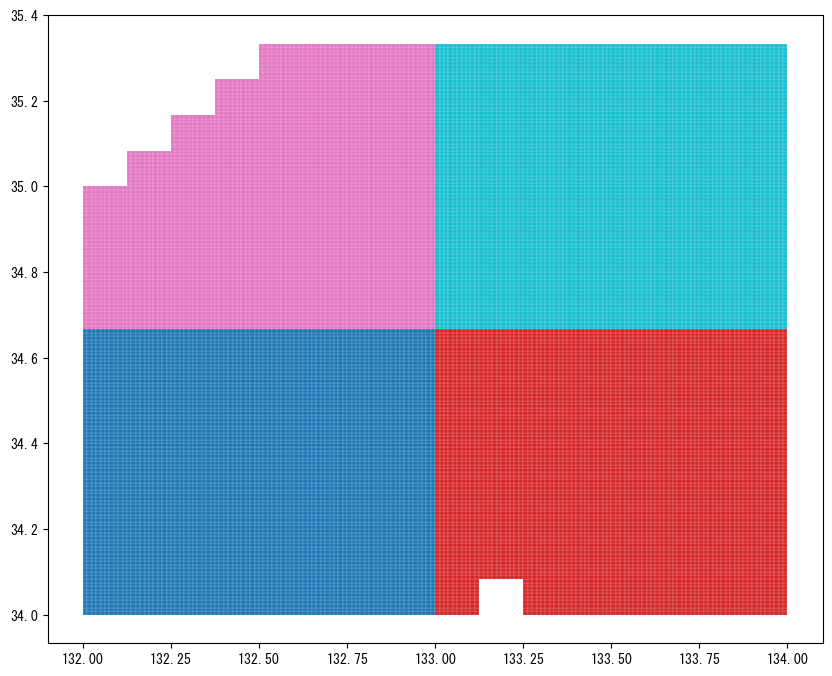

In [6]:
# quick plot
hiroshimamesh.plot(figsize=(10,10),edgecolor='white',linewidth=0.1,column = 'MESH1_ID')

ちゃんとしたマップがないと何なのかわからない

カラフルなかたまり

In [7]:
hiroshimamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,51320000,5132,00,00,1,"POLYGON ((132.01250 34.00000, 132.00000 34.000..."
1,51320001,5132,00,01,2,"POLYGON ((132.02500 34.00000, 132.01250 34.000..."
2,51320002,5132,00,02,3,"POLYGON ((132.03750 34.00000, 132.02500 34.000..."
3,51320003,5132,00,03,4,"POLYGON ((132.05000 34.00000, 132.03750 34.000..."
4,51320004,5132,00,04,5,"POLYGON ((132.06250 34.00000, 132.05000 34.000..."


In [8]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
hdata1 = pd.read_csv('data2/tblT001100S5132.zip', encoding='cp932')
hdata4 = pd.read_csv('data2/tblT001100S5133.zip', encoding='cp932')
hdata2 = pd.read_csv('data2/tblT001100S5232.zip', encoding='cp932')
hdata3 = pd.read_csv('data2/tblT001100S5233.zip', encoding='cp932')

In [9]:
# check data
hdata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2


In [10]:
# ４つのテーブルから１行目を削除
hdata1 = hdata1[1:]
hdata2 = hdata2[1:]
hdata3 = hdata3[1:]
hdata4 = hdata4[1:]

In [13]:
# ４つのテーブルから「＊」を非数に置き換える
hdata1 = hdata1.replace('*',np.NAN)
hdata2 = hdata2.replace('*',np.NAN)
hdata3 = hdata3.replace('*',np.NAN)
hdata4 = hdata4.replace('*',np.NAN)

In [14]:
hdata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,2.0,51320014.0,NaN,4,1,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,51327794.0,0.0,NaN,NaN,52,21,31,6,1,5,...,0,2,16,14,2,2,22,0,6,11
3107,51327795.0,1.0,NaN,51327784,16,5,11,4,2,2,...,1,0,5,3,2,2,4,4,0,2
3108,51327796.0,0.0,NaN,NaN,56,25,31,1,0,1,...,0,0,20,17,3,1,20,0,4,9
3109,51327797.0,0.0,NaN,NaN,21,11,10,3,3,0,...,0,1,5,2,3,0,6,0,1,1


In [16]:
# 4つのデータを統合
hiroshimadata = pd.concat([hdata1,hdata2,hdata3,hdata4])

In [17]:
# check data info
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13539 entries, 1 to 3311
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13539 non-null  float64
 1   HTKSYORI    13539 non-null  float64
 2   HTKSAKI     2776 non-null   float64
 3   GASSAN      2084 non-null   object 
 4   T001100001  13539 non-null  object 
 5   T001100002  13539 non-null  object 
 6   T001100003  13539 non-null  object 
 7   T001100004  10763 non-null  object 
 8   T001100005  10763 non-null  object 
 9   T001100006  10763 non-null  object 
 10  T001100007  10763 non-null  object 
 11  T001100008  10763 non-null  object 
 12  T001100009  10763 non-null  object 
 13  T001100010  10763 non-null  object 
 14  T001100011  10763 non-null  object 
 15  T001100012  10763 non-null  object 
 16  T001100013  10763 non-null  object 
 17  T001100014  10763 non-null  object 
 18  T001100015  10763 non-null  object 
 19  T001100016  10763 non-null  obj

In [18]:
# まずはカラムをアウトプット
hiroshimadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [19]:
# 4番目以降をアウトプット
hiroshimadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [20]:
# このカラムをテーブル形式で見る
hiroshimadata[hiroshimadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158,78,80,11,6,5,147,72,75,71,...,3,0,48,39,9,4,51,0,12,17
2,36,22,14,0,0,0,36,22,14,20,...,0,0,12,11,1,0,11,0,3,4
3,18,7,11,0,0,0,18,7,11,5,...,0,0,7,6,1,0,8,0,2,3
4,54,33,21,5,3,2,49,30,19,29,...,1,0,13,10,3,1,13,0,4,2
5,4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,5526,2556,2970,882,476,406,4565,2044,2521,3149,...,19,4,1540,1433,107,239,906,51,317,269
3308,223,115,108,17,10,7,202,103,99,134,...,0,0,46,39,7,3,46,3,19,7
3309,177,87,90,29,15,14,148,72,76,94,...,3,2,41,32,9,8,32,0,9,10
3310,890,413,477,109,47,62,776,363,413,451,...,9,2,261,213,48,32,213,7,53,65


In [21]:
# objectからfloatに変換
hiroshimadata[hiroshimadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158.0,78.0,80.0,11.0,6.0,5.0,147.0,72.0,75.0,71.0,...,3.0,0.0,48.0,39.0,9.0,4.0,51.0,0.0,12.0,17.0
2,36.0,22.0,14.0,0.0,0.0,0.0,36.0,22.0,14.0,20.0,...,0.0,0.0,12.0,11.0,1.0,0.0,11.0,0.0,3.0,4.0
3,18.0,7.0,11.0,0.0,0.0,0.0,18.0,7.0,11.0,5.0,...,0.0,0.0,7.0,6.0,1.0,0.0,8.0,0.0,2.0,3.0
4,54.0,33.0,21.0,5.0,3.0,2.0,49.0,30.0,19.0,29.0,...,1.0,0.0,13.0,10.0,3.0,1.0,13.0,0.0,4.0,2.0
5,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,5526.0,2556.0,2970.0,882.0,476.0,406.0,4565.0,2044.0,2521.0,3149.0,...,19.0,4.0,1540.0,1433.0,107.0,239.0,906.0,51.0,317.0,269.0
3308,223.0,115.0,108.0,17.0,10.0,7.0,202.0,103.0,99.0,134.0,...,0.0,0.0,46.0,39.0,7.0,3.0,46.0,3.0,19.0,7.0
3309,177.0,87.0,90.0,29.0,15.0,14.0,148.0,72.0,76.0,94.0,...,3.0,2.0,41.0,32.0,9.0,8.0,32.0,0.0,9.0,10.0
3310,890.0,413.0,477.0,109.0,47.0,62.0,776.0,363.0,413.0,451.0,...,9.0,2.0,261.0,213.0,48.0,32.0,213.0,7.0,53.0,65.0


In [22]:
# 元のデータを入れ替える
hiroshimadata[hiroshimadata.columns[4:]]=hiroshimadata[hiroshimadata.columns[4:]].astype(float)

In [23]:
# check!
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13539 entries, 1 to 3311
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13539 non-null  float64
 1   HTKSYORI    13539 non-null  float64
 2   HTKSAKI     2776 non-null   float64
 3   GASSAN      2084 non-null   object 
 4   T001100001  13539 non-null  float64
 5   T001100002  13539 non-null  float64
 6   T001100003  13539 non-null  float64
 7   T001100004  10763 non-null  float64
 8   T001100005  10763 non-null  float64
 9   T001100006  10763 non-null  float64
 10  T001100007  10763 non-null  float64
 11  T001100008  10763 non-null  float64
 12  T001100009  10763 non-null  float64
 13  T001100010  10763 non-null  float64
 14  T001100011  10763 non-null  float64
 15  T001100012  10763 non-null  float64
 16  T001100013  10763 non-null  float64
 17  T001100014  10763 non-null  float64
 18  T001100015  10763 non-null  float64
 19  T001100016  10763 non-null  flo

In [24]:
# KEY_CODEをfloatに
hiroshimamesh['KEY_CODE']=hiroshimamesh['KEY_CODE'].astype(float)

In [25]:
# merge the data
hiroshimamesh = hiroshimamesh.merge(hiroshimadata, on='KEY_CODE')

In [26]:
# check!
hiroshimamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
5599,51336628.0,5133,66,28,5329,"POLYGON ((133.86250 34.51667, 133.85000 34.516...",0.0,NaN,NaN,13.0,...,0.0,0.0,5.0,5.0,0.0,0.0,7.0,0.0,2.0,3.0
4037,51333130.0,5133,31,30,2431,"POLYGON ((133.13750 34.27500, 133.12500 34.275...",0.0,NaN,NaN,279.0,...,1.0,0.0,85.0,65.0,20.0,2.0,84.0,8.0,20.0,27.0
10094,52330705.0,5233,07,05,706,"POLYGON ((133.95000 34.66667, 133.93750 34.666...",0.0,NaN,NaN,8571.0,...,15.0,3.0,2208.0,2081.0,127.0,333.0,1283.0,258.0,477.0,379.0
4359,51334086.0,5133,40,86,3187,"POLYGON ((133.08750 34.40000, 133.07500 34.400...",0.0,NaN,NaN,3146.0,...,6.0,2.0,922.0,845.0,77.0,96.0,756.0,38.0,293.0,243.0
6486,52320188.0,5232,01,88,189,"POLYGON ((132.23750 34.73333, 132.22500 34.733...",1.0,NaN,52320197;52320198,91.0,...,1.0,0.0,19.0,13.0,6.0,2.0,16.0,0.0,1.0,4.0


#### MAP TIME!!!!!

ここまでするのが大変だった😣

データ多すぎる、、、

In [27]:
# reproject to 3857 (web mercator)
hiroshimamesh = hiroshimamesh.to_crs(3857)

<Axes: >

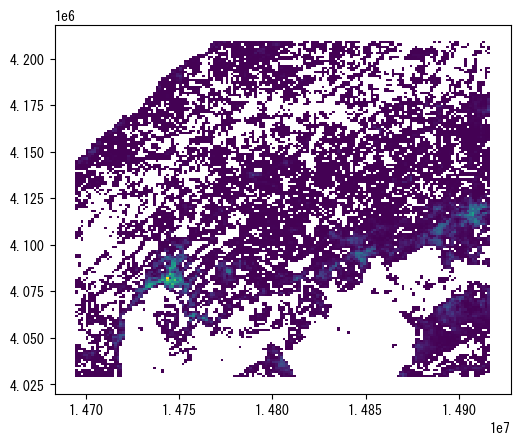

In [28]:
# make a quick plot
hiroshimamesh.plot(column='T001100001')

瀬戸内海側の方が人が多い

脳みそみたい。すかすか

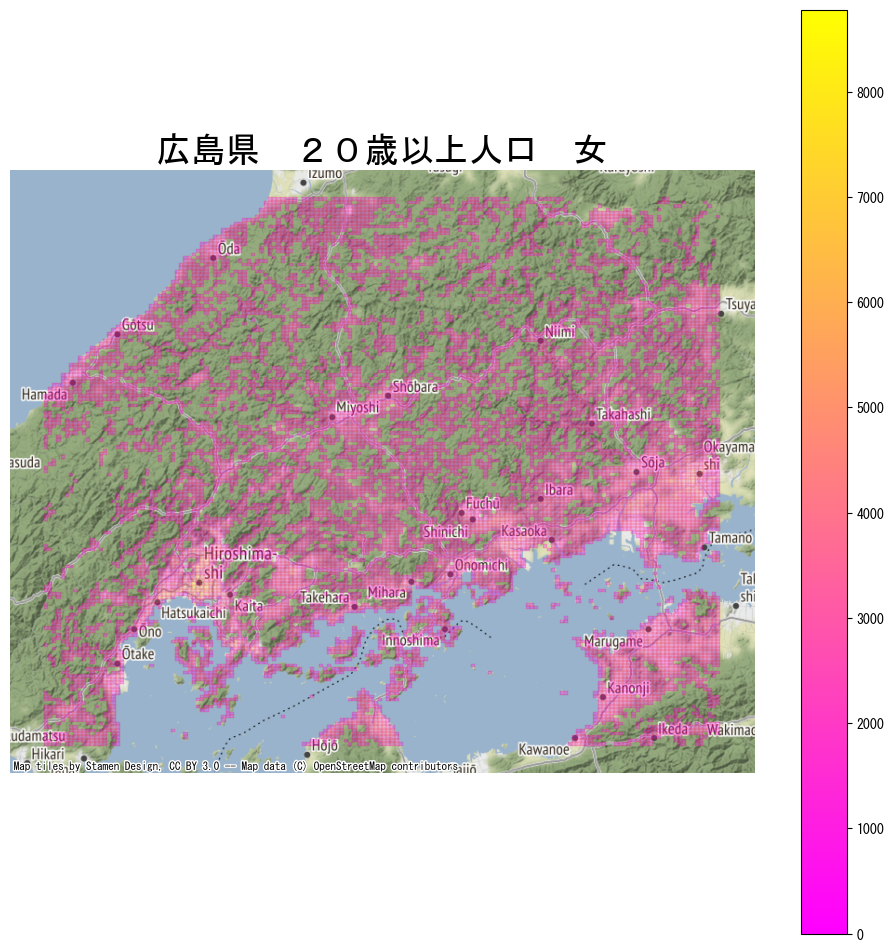

In [54]:
# population map
ax = hiroshimamesh.plot(figsize=(12,12),
         column='T001100018',
         legend=True,
         cmap='spring',
         edgecolor='red',
         linewidth=0.3,
         alpha=0.3)

# hide axes
ax.axis('off')

# title
ax.set_title('広島県　２０歳以上人口　女',fontsize=25);

# add basemap
cx.add_basemap(ax)

意外と若者がいるんだなと思った

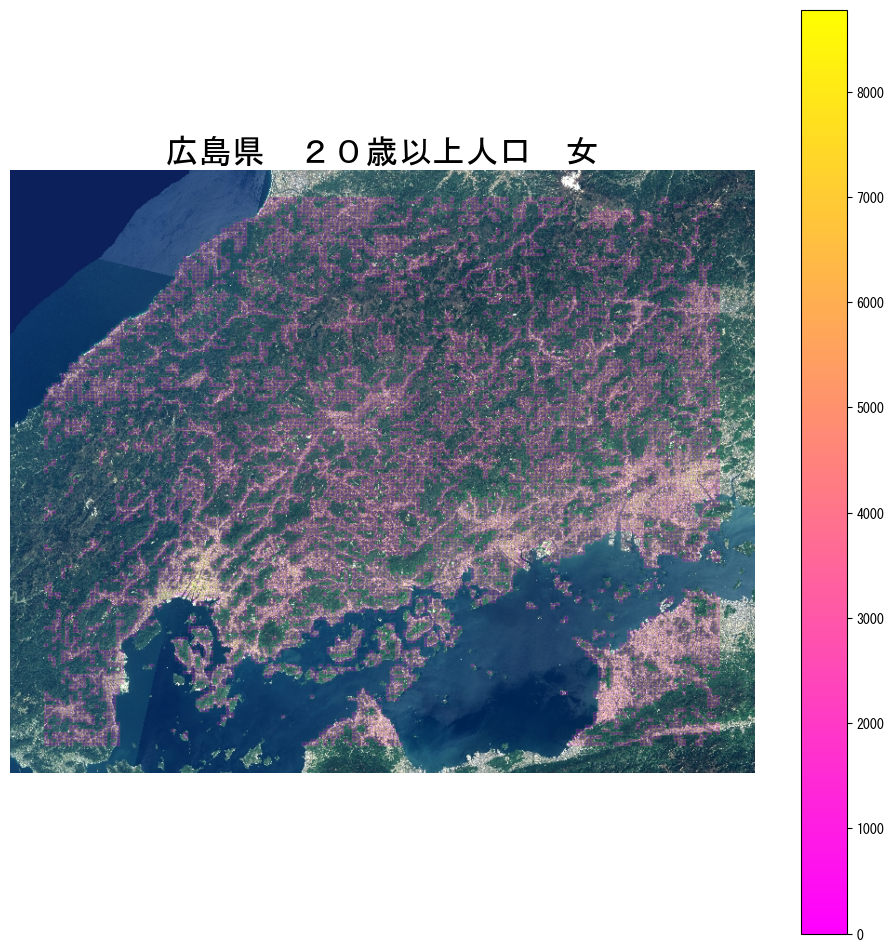

In [68]:
# population map
ax = hiroshimamesh.plot(figsize=(12,12),
         column='T001100018',
         legend=True,
         cmap='spring',
         edgecolor='yellow',
         linewidth=0.3,
         alpha=0.2)

# hide axes
ax.axis('off')

# title
ax.set_title('広島県　２０歳以上人口　女',fontsize=24);

# add basemap
cx.add_basemap(ax,source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

springが一番見やすい色！季節以外の色はできない？

## 感想

今回のマップを作ってみて、山でないところ（白くなっているところ）に人がちゃんと住んでいることが分かるマップができたと思いました。また、山の中央の方よりも外側に人が多くいることが分かりました。広島県は瀬戸内海に面しており昔から漁業や航海が盛んに行われていたから外側の方が賑わっているのかなと思いました。

今まで作ったマップを全部組み合わせてみたいと思いました。授業を行うごとにどんどん扱うデータが増えてきてとても大変ですが、発見が沢山あり面白いです！